#  EDA

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data from csv files.
train = pd.read_csv('train.csv')
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')

In [3]:
print(train.info())
print(features.info())
print(stores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDo

In [4]:
#Since we have been given three distinct files we joined theses and formed new data file as data.

data = train.merge(features, on=['Store', 'Date'], how='inner').merge(stores, on=['Store'], how='inner')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [5]:
#drop the dublicate of IsHoliday column
data = data.drop(columns=['IsHoliday_y'])
data = data.rename(columns={'IsHoliday_x': 'IsHoliday'})

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


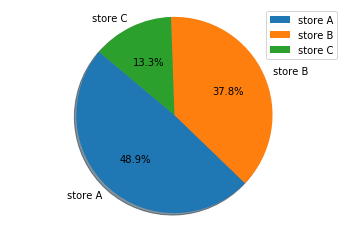

In [13]:
# Pie-chart for the visual representation of store types

# Data to plot
labels = 'store A','store B','store C'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

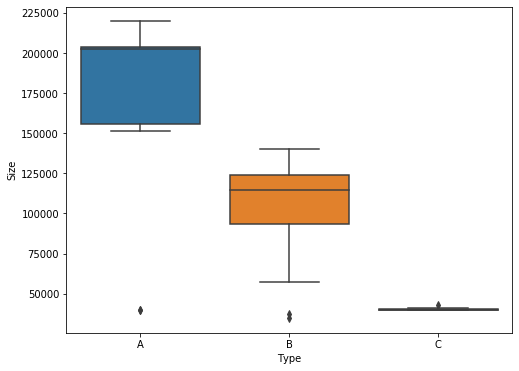

In [7]:
# boxplot for sizes of types of stores
store_type = pd.concat([stores['Type'], stores['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=store_type)

There are 45 stores in total.
There are a total of 3 types of stores: Type A, B, and C.
By boxplot and piechart, we can say that type A store is the largest store and C is the smallest
There is no overlapped area in size among A, B, and C

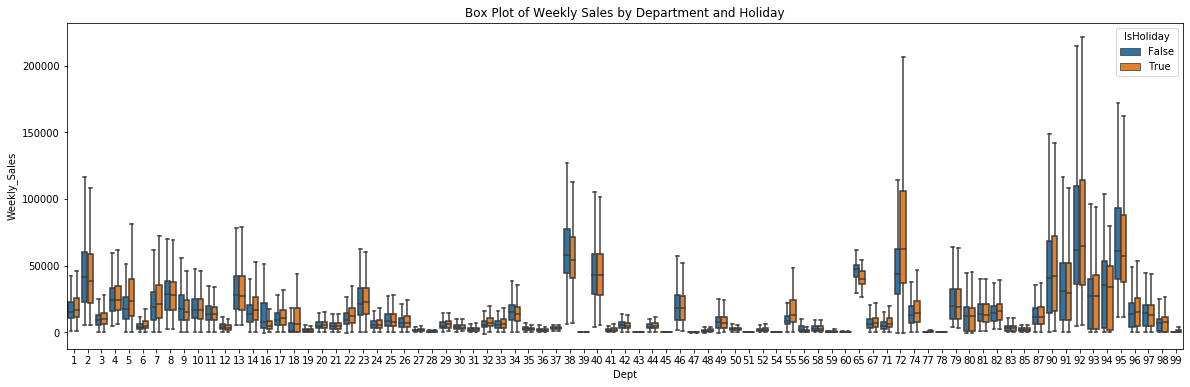

In [8]:
data_11= pd.concat([data['Dept'], data['Weekly_Sales'], data['IsHoliday']], axis=1)
plt.figure(figsize=(20,6))
plt.title('Box Plot of Weekly Sales by Department and Holiday')
fig = sns.boxplot(x='Dept', y='Weekly_Sales', data=data_11, showfliers=False, hue="IsHoliday")

Sales on holiday is a little bit more than sales in not-holiday
From this plot, we notice the Department with the highest sales lies between Dept 60 and 80
Total we have 421570 values for training and 115064 for testing as part of the competition. But we will work only on 421570 data as we have labels to test the performance and accuracy of models

In [20]:
print(data.describe().T)

                 count           mean           std        min           25%  \
Store         421570.0      22.200546     12.785297      1.000     11.000000   
Dept          421570.0      44.260317     30.492054      1.000     18.000000   
Weekly_Sales  421570.0   15981.258123  22711.183519  -4988.940   2079.650000   
Temperature   421570.0      60.090059     18.447931     -2.060     46.680000   
Fuel_Price    421570.0       3.361027      0.458515      2.472      2.933000   
MarkDown1     150681.0    7246.420196   8291.221345      0.270   2240.270000   
MarkDown2     111248.0    3334.628621   9475.357325   -265.760     41.600000   
MarkDown3     137091.0    1439.421384   9623.078290    -29.100      5.080000   
MarkDown4     134967.0    3383.168256   6292.384031      0.220    504.220000   
MarkDown5     151432.0    4628.975079   5962.887455    135.160   1878.440000   
CPI           421570.0     171.201947     39.159276    126.064    132.022667   
Unemployment  421570.0       7.960289   

Replaced null values with zeros. Also,looking at the statistics of the dataframe we come to know that there are some rows for which Weekly sales have negative values. Since sales values can’t be negative, we skipped those rows having negative weekly sales.

In [22]:
data=data.fillna(0)
data = data[data['Weekly_Sales'] >= 0]


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

AxesSubplot(0.125,0.125;0.62x0.755)


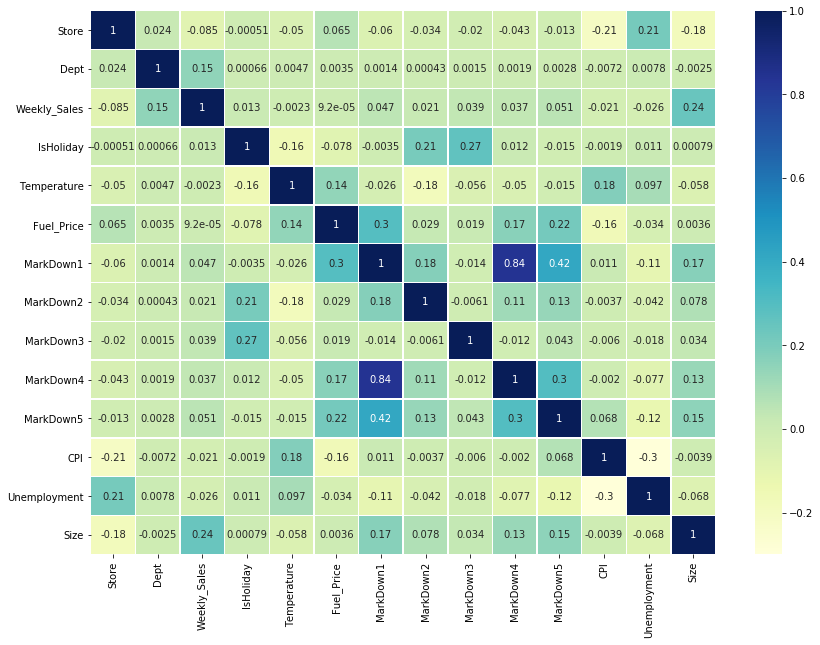

In [35]:
fig, ax = plt.subplots(figsize=(14,10))         # Sample figsize in inches
print(sns.heatmap(data.corr(),cmap="YlGnBu", annot=True, linewidths=.5, ax=ax))


Correlation is a bivariate analysis that measures the strength of association between two variables and the direction of the relationship. In terms of the strength of the relationship, the value of the correlation coefficient varies between +1 and -1.

In [38]:
test = pd.read_csv('test.csv')
print(test.shape)

(115064, 4)


Some data preprocceing might be needed. Data is now ready for Machine learning model.However, I filled missing markdown data with zeroes. another impi=utation method such as median or the mean can tested after evaluating the model performance.

Total we have 421570 values for training and 115064 for testing as part of the competition. But we will work only on 421570 data as we have labels to test the performance and accuracy of models.